# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


#  Apply NB

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [1]:
#importing some of the libraries 

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

import re
import pickle
import os
from tqdm import tqdm


In [2]:
import pandas
data = pandas.read_csv('preprocessed_data.csv')  #reading the csv file using pandas
print('Shape of the data is :', data.shape)      #print's shape of the data
print('\n', '*' * 100 )
print('\n',"The attributes of the preprocessed data is :",'\n',data.columns.values, '\n') #print's attributes of data
data.head()  # show's all the data

Shape of the data is : (109248, 9)

 ****************************************************************************************************

 The attributes of the preprocessed data is : 
 ['school_state' 'teacher_prefix' 'project_grade_category'
 'teacher_number_of_previously_posted_projects' 'project_is_approved'
 'clean_categories' 'clean_subcategories' 'essay' 'price'] 



,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [3]:
y = data['project_is_approved'].values              #storing the class label into another variable
x = data.drop(['project_is_approved'], axis = 1)    #Dropping the calss label from dataset
x.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [4]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, stratify = y)
x_train, x_cv, y_train, y_cv = train_test_split(x_train,y_train,test_size = 0.33, stratify = y_train)

<h2>1.3 Make Data Model Ready: encoding eassay</h2>

In [5]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
print("Shape of x_train, y_train :", x_train.shape, y_train.shape)
print("Shape of x_cv, y_cv :", x_cv.shape, y_cv.shape)
print("Shape of x_test, y_test :", x_test.shape, y_test.shape)

print("*" * 100)

print("Encoding essay : " , "\n")
vectorizer = CountVectorizer(min_df = 10, ngram_range = (1,4), max_features = 5000)
vectorizer.fit(x_train['essay'].values)

x_train_essay_bow = vectorizer.transform(x_train['essay'].values)
x_cv_essay_bow = vectorizer.transform(x_cv['essay'].values)
x_test_essay_bow = vectorizer.transform(x_test['essay'].values)

print("After Vectorization")
print("Shape of x_train, y_train :", x_train_essay_bow.shape, y_train.shape)
print("Shape of x_cv, y_cv :", x_cv_essay_bow.shape, y_cv.shape)
print("Shape of x_test, y_test :", x_test_essay_bow.shape, y_test.shape)



Shape of x_train, y_train : (49041, 8) (49041,)
Shape of x_cv, y_cv : (24155, 8) (24155,)
Shape of x_test, y_test : (36052, 8) (36052,)
****************************************************************************************************
Encoding essay :  

After Vectorization
Shape of x_train, y_train : (49041, 5000) (49041,)
Shape of x_cv, y_cv : (24155, 5000) (24155,)
Shape of x_test, y_test : (36052, 5000) (36052,)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

<h3>encoding numerical feature : Price</h3>

In [6]:
from sklearn.preprocessing import Normalizer   #importing normalizer from sklearn library
normalizer = Normalizer()

normalizer.fit(x_train['price'].values.reshape(1, -1))    #fitting the model on feature using x_train['price']

x_train_price_norm = normalizer.transform(x_train['price'].values.reshape(-1, 1))
x_cv_price_norm = normalizer.transform(x_cv['price'].values.reshape(-1, 1))
x_test_price_norm = normalizer.transform(x_test['price'].values.reshape(-1, 1))

print("After Vectorization :")           

print(x_train_price_norm.shape, y_train.shape)  #it will print's shape of the data
print(x_cv_price_norm.shape, y_cv.shape)
print(x_test_price_norm.shape, y_test.shape)


After Vectorization :
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


<h3>encoding numerical feature : teacher_number_of_previously_posted_projects 

In [7]:
from sklearn.preprocessing import Normalizer  #importing normalizer from sklearn
normalizer = Normalizer()
normalizer.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

x_train_norm_teacher_number_of_previously_posted_projects = normalizer.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
x_cv_norm_teacher_number_of_previously_posted_projects = normalizer.transform(x_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_test_norm_teacher_number_of_previously_posted_projects = normalizer.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After Vectorixation : ")
print(x_train_norm_teacher_number_of_previously_posted_projects.shape, y_train.shape)
print(x_cv_norm_teacher_number_of_previously_posted_projects.shape, y_cv.shape)
print(x_test_norm_teacher_number_of_previously_posted_projects.shape, y_test.shape)

After Vectorixation : 
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


<h3> Vectorizing feature after Vectorization </h3>

In [8]:
#after completion of vectorization storing all feature's into a 2 diff list forms

feature_bow = []
feature_tfidf = []

<h3> encoding categorical feature : school state </h3>

In [9]:
vectorizer = CountVectorizer()     # importing Countvectorizer from sklearn.feature_extraction.text
vectorizer.fit(x_train["school_state"].values)  #fiting a model using the values 

x_train_school_state = vectorizer.transform(x_train['school_state'].values)
x_cv_school_state = vectorizer.transform(x_cv['school_state'].values)
x_test_school_state = vectorizer.transform(x_test['school_state'].values)

print("After Vectorization :")
print(x_train_school_state.shape, y_train.shape)  #it will prints shape of the data 
print(x_cv_school_state.shape, y_cv.shape)
print(x_test_school_state.shape, y_test.shape)

print("*" * 100)
print(vectorizer.get_feature_names())               #print's feeatures of school_state 
feature_bow.extend(vectorizer.get_feature_names())  #features are added into a list feature_bow = []
feature_tfidf.extend(vectorizer.get_feature_names()) #features are added into a list  tfidf__bow = []

After Vectorization :
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
****************************************************************************************************
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


<h3> encoding categorical feature : teacher_prefix </h3>

In [10]:
vectorizer  = CountVectorizer()
vectorizer.fit(x_train['teacher_prefix'].values)

x_train_teacher_prefix = vectorizer.transform(x_train['teacher_prefix'].values)
x_cv_teacher_prefix  = vectorizer.transform(x_cv['teacher_prefix'].values)
x_test_teacher_prefix  = vectorizer.transform(x_test['teacher_prefix'].values)

print("After Vectorizer : ")
print(x_train_teacher_prefix.shape , y_train.shape)
print(x_cv_teacher_prefix.shape , y_cv.shape)
print(x_test_teacher_prefix.shape , y_test.shape)

print("*" * 100)
print(vectorizer.get_feature_names())
feature_bow.extend(vectorizer.get_feature_names())
feature_tfidf.extend(vectorizer.get_feature_names())

After Vectorizer : 
(49041, 5) (49041,)
(24155, 5) (24155,)
(36052, 5) (36052,)
****************************************************************************************************
['dr', 'mr', 'mrs', 'ms', 'teacher']


<h3> encoding categorical feature : project_grade_category </h3>

In [11]:
vectorizer  = CountVectorizer()
vectorizer.fit(x_train['project_grade_category'].values)

x_train_project_grade_category = vectorizer.transform(x_train['project_grade_category'].values)
x_cv_project_grade_category  = vectorizer.transform(x_cv['project_grade_category'].values)
x_test_project_grade_category  = vectorizer.transform(x_test['project_grade_category'].values)

print("After Vectorizer : ")
print(x_train_project_grade_category.shape, y_train.shape)
print(x_cv_project_grade_category.shape , y_cv.shape)
print(x_test_project_grade_category.shape , y_test.shape)

print("*" * 100)
print(vectorizer.get_feature_names())
feature_bow.extend(vectorizer.get_feature_names())
feature_tfidf.extend(vectorizer.get_feature_names())

After Vectorizer : 
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)
****************************************************************************************************
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


<h3> encoding categorical feature : clean_categories </h3>

In [12]:
vectorizer  = CountVectorizer()
vectorizer.fit(x_train['clean_categories'].values)

x_train_clean_categories = vectorizer.transform(x_train['clean_categories'].values)
x_cv_clean_categories = vectorizer.transform(x_cv['clean_categories'].values)
x_test_clean_categories = vectorizer.transform(x_test['clean_categories'].values)

print("After Vectorizer : ")
print(x_train_clean_categories.shape, y_train.shape)
print(x_cv_clean_categories.shape , y_cv.shape)
print(x_test_clean_categories.shape , y_test.shape)

print("*" * 100)
print(vectorizer.get_feature_names())
feature_bow.extend(vectorizer.get_feature_names())
feature_tfidf.extend(vectorizer.get_feature_names())

After Vectorizer : 
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
****************************************************************************************************
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


<h3> encoding categorical feature : clean_subcategories </h3>

In [13]:
vectorizer  = CountVectorizer()
vectorizer.fit(x_train['clean_subcategories'].values)

x_train_clean_subcategories = vectorizer.transform(x_train['clean_subcategories'].values)
x_cv_clean_subcategories = vectorizer.transform(x_cv['clean_subcategories'].values)
x_test_clean_subcategories = vectorizer.transform(x_test['clean_subcategories'].values)

print("After Vectorizer : ")
print(x_train_clean_subcategories.shape, y_train.shape)
print(x_cv_clean_subcategories.shape , y_cv.shape)
print(x_test_clean_subcategories.shape , y_test.shape)

print("*" * 100)
print(vectorizer.get_feature_names())
feature_bow.extend(vectorizer.get_feature_names())
feature_tfidf.extend(vectorizer.get_feature_names())

After Vectorizer : 
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)
****************************************************************************************************
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [14]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
x_tr = hstack((x_train_essay_bow, x_train_school_state, x_train_teacher_prefix, x_train_project_grade_category, x_train_price_norm,x_train_clean_subcategories,x_train_norm_teacher_number_of_previously_posted_projects)).tocsr()
x_cv = hstack((x_cv_essay_bow, x_cv_school_state, x_cv_teacher_prefix, x_cv_project_grade_category, x_cv_price_norm,x_cv_clean_subcategories,x_cv_norm_teacher_number_of_previously_posted_projects)).tocsr()
x_te = hstack((x_test_essay_bow, x_test_school_state, x_test_teacher_prefix, x_test_project_grade_category, x_test_price_norm,x_test_clean_subcategories,x_test_norm_teacher_number_of_previously_posted_projects)).tocsr()

print("Final Data matrix :")
print(x_tr.shape, y_train.shape)
print(x_cv.shape, y_cv.shape)
print(x_te.shape, y_test.shape)
print("="*100)

Final Data matrix :
(49041, 5092) (49041,)
(24155, 5092) (24155,)
(36052, 5092) (36052,)


<h3>Bag of words : Essay</h3>

In [15]:
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(x_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_text_bow = vectorizer.transform(x_train['essay'].values)
x_test_text_bow = vectorizer.transform(x_test['essay'].values)

print("After vectorizations")
print(x_train_text_bow.shape, y_train.shape)  #it will print's shape of the data 
print(x_test_text_bow.shape, y_test.shape)
print(vectorizer.get_feature_names())

feature_bow.extend(vectorizer.get_feature_names())  #feature will added into a list format

After vectorizations
(49041, 12120) (49041,)
(36052, 12120) (36052,)
['00', '000', '10', '100', '1000', '100th', '101', '102', '103', '10th', '11', '110', '1100', '115', '11th', '12', '120', '1200', '123', '125', '12th', '13', '130', '1300', '13th', '14', '140', '1400', '14th', '15', '150', '1500', '16', '160', '1600', '17', '170', '17th', '18', '180', '1800', '19', '1950', '1950s', '1990', '1993', '19th', '1st', '20', '200', '2000', '2001', '2002', '2003', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '20th', '21', '21st', '22', '220', '225', '23', '24', '240', '25', '250', '26', '260', '27', '270', '28', '280', '29', '2d', '2nd', '30', '300', '3000', '31', '32', '320', '33', '34', '340', '35', '350', '36', '360', '365', '37', '375', '38', '380', '39', '3d', '3doodler', '3doodlers', '3rd', '40', '400', '41', '42', '43', '430', '44', '45', '450', '451', '46', '47', '475', '48', '480', '49', '4c', '4k', '4th', '50', '500'

<h3> Tf-idf : Essay </h3>

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(x_train['essay'].values) # fit has to happen only on train data

# we use the fitted tfidfVectorizer to convert the text to vector
x_train_text_tfidf = vectorizer.transform(x_train['essay'].values)   
x_test_text_tfidf = vectorizer.transform(x_test['essay'].values)

print("After vectorizations")
print(x_train_text_tfidf.shape, y_train.shape)  #print's shape of the data
print(x_test_text_tfidf.shape, y_test.shape)
print(vectorizer.get_feature_names())

feature_tfidf.extend(vectorizer.get_feature_names())  #values are stored into an feature_tfidf in list format

After vectorizations
(49041, 12120) (49041,)
(36052, 12120) (36052,)
['00', '000', '10', '100', '1000', '100th', '101', '102', '103', '10th', '11', '110', '1100', '115', '11th', '12', '120', '1200', '123', '125', '12th', '13', '130', '1300', '13th', '14', '140', '1400', '14th', '15', '150', '1500', '16', '160', '1600', '17', '170', '17th', '18', '180', '1800', '19', '1950', '1950s', '1990', '1993', '19th', '1st', '20', '200', '2000', '2001', '2002', '2003', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '20th', '21', '21st', '22', '220', '225', '23', '24', '240', '25', '250', '26', '260', '27', '270', '28', '280', '29', '2d', '2nd', '30', '300', '3000', '31', '32', '320', '33', '34', '340', '35', '350', '36', '360', '365', '37', '375', '38', '380', '39', '3d', '3doodler', '3doodlers', '3rd', '40', '400', '41', '42', '43', '430', '44', '45', '450', '451', '46', '47', '475', '48', '480', '49', '4c', '4k', '4th', '50', '500'

<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

<h3> Apply Naive Bayes on BOW, <font color = 'green'> Set-1 </font> : </h3>

In [17]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# adding all the feature into a sparse matrix 
from scipy.sparse import hstack
x_tr = hstack((x_train_school_state, x_train_teacher_prefix, x_train_project_grade_category, x_train_price_norm,x_train_clean_subcategories,x_train_norm_teacher_number_of_previously_posted_projects,x_train_text_bow)).tocsr()
x_te = hstack((x_test_school_state, x_test_teacher_prefix, x_test_project_grade_category, x_test_price_norm,x_test_clean_subcategories,x_test_norm_teacher_number_of_previously_posted_projects,x_test_text_bow)).tocsr()

print("Final Data matrix :")
print(x_tr.shape, y_train.shape) #print's shape of the matrx 
print(x_te.shape, y_test.shape)


Final Data matrix :
(49041, 12212) (49041,)
(36052, 12212) (36052,)


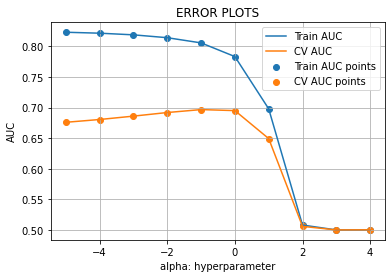

In [18]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#importing some of the libraries 
import warnings
import math
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV  #importing grid_search
from sklearn.naive_bayes import MultinomialNB     #importing multinomial nb 

nb = MultinomialNB(fit_prior=False)
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}  # using some alpha values 
clf = GridSearchCV(nb, parameters, cv=10, scoring='roc_auc',return_train_score=True, n_jobs=-1)
clf.fit(x_tr, y_train)                 #fitting our modeal using grid_search

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

parameters['alpha'] = [math.log10(i) for i in parameters['alpha']]  


plt.plot(parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
#plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
#plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

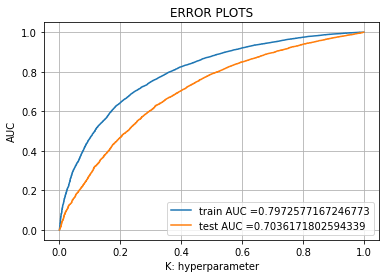

In [19]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB


nb = MultinomialNB(alpha=0.1,class_prior=[0.5,0.5])
nb.fit(x_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = nb.predict_proba(x_tr)[:,1]  
y_test_pred = nb.predict_proba(x_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [20]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):  #defining a new fun
    predictions = [] 
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.5277104654748996 for threshold 0.496

Train confusion matrix :


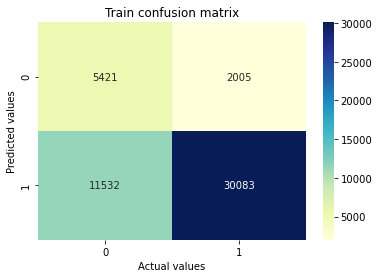

**************************************************************************************************** 

the maximum value of tpr*(1-fpr) 0.43025244177066463 for threshold 0.763

Test confusion matrix :


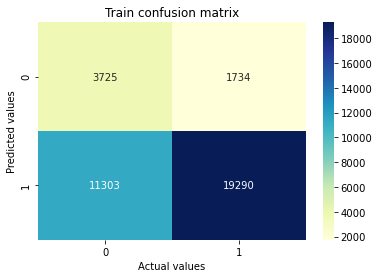

In [21]:
from sklearn.metrics import confusion_matrix   # importing confusion matrix to measure it performance

best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr) 

print("\nTrain confusion matrix :")
con_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
sns.heatmap(con_train, annot = True,cmap = 'YlGnBu',fmt = 'd')     #using heatmap imported from seaborn
plt.title("Train confusion matrix")  #plotting the confusion matrix with x_label,y_label,title 
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()   # show's confusion matrix

print("**"*50, '\n')
best_t = find_best_threshold(te_thresholds, test_fpr, test_tpr)
print("\nTest confusion matrix :")
con_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
sns.heatmap(con_test, annot = True,cmap = 'YlGnBu',fmt = 'd')
plt.title("Train confusion matrix")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

<h4> Top 10 +ve, -ve features from set-1 :</h4>

In [22]:
pos_class_prob_sorted = nb.feature_log_prob_[1].argsort()
print("The top 10 positive features are : ")
print(np.take(feature_bow, pos_class_prob_sorted[-10:]))

The top 10 positive features are : 
['heightened' 'lean' 'north' 'thermal' 'thank' 'classification' 'leap'
 'musician' 'schema' 'structuring']


In [23]:
pos_class_prob_sorted = nb.feature_log_prob_[0].argsort()
print("The top 10 negative features are : ")
print(np.take(feature_bow, pos_class_prob_sorted[-10:]))

The top 10 negative features are : 
['thank' 'heightened' 'thermal' 'lean' 'north' 'classification' 'musician'
 'leap' 'schema' 'structuring']


<h3> Apply Naive Bayes on Tf-idf, <font color = 'green'> Set-2</font>: </h3>

In [24]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
x_tr = hstack((x_train_school_state, x_train_teacher_prefix, x_train_project_grade_category, x_train_price_norm,x_train_clean_subcategories,x_train_norm_teacher_number_of_previously_posted_projects,x_train_text_tfidf)).tocsr()
x_te = hstack((x_test_school_state, x_test_teacher_prefix, x_test_project_grade_category, x_test_price_norm,x_test_clean_subcategories,x_test_norm_teacher_number_of_previously_posted_projects,x_test_text_tfidf)).tocsr()

print("Final Data matrix :")
print(x_tr.shape, y_train.shape)  
print(x_te.shape, y_test.shape)


Final Data matrix :
(49041, 12212) (49041,)
(36052, 12212) (36052,)


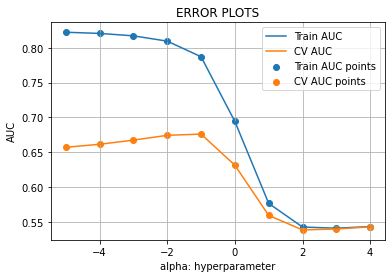

In [25]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
import warnings
import math
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB(fit_prior=False)
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
clf = GridSearchCV(nb, parameters, cv=10, scoring='roc_auc',return_train_score=True, n_jobs=-1)
clf.fit(x_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

parameters['alpha'] = [math.log10(i) for i in parameters['alpha']]


plt.plot(parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
#plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
#plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

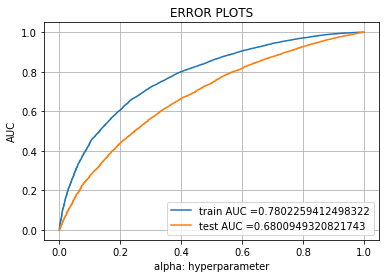

In [26]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB(alpha= 0.1,class_prior=[0.5,0.5])
nb.fit(x_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = nb.predict_proba(x_tr)[:,1]    
y_test_pred = nb.predict_proba(x_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr )))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [27]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.5063659675945924 for threshold 0.501

Train confusion matrix :


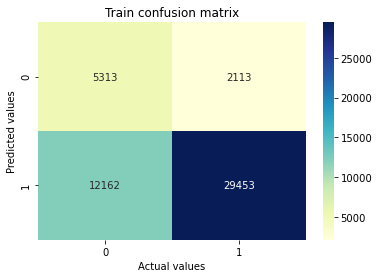

**************************************************************************************************** 

the maximum value of tpr*(1-fpr) 0.40245870975600584 for threshold 0.534

Test confusion matrix :


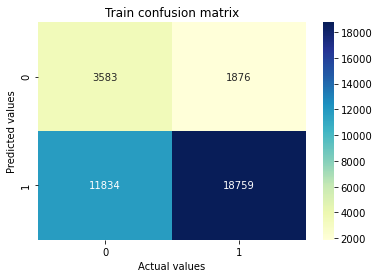

In [28]:
from sklearn.metrics import confusion_matrix

best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

print("\nTrain confusion matrix :")
con_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
sns.heatmap(con_train, annot = True,cmap = 'YlGnBu',fmt = 'd')
plt.title("Train confusion matrix")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

print("**"*50, '\n')
best_t = find_best_threshold(te_thresholds, test_fpr, test_tpr)
print("\nTest confusion matrix :")
con_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
sns.heatmap(con_test, annot = True,cmap = 'YlGnBu',fmt = 'd')
plt.title("Train confusion matrix")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

<h4> Top 10 +ve, -ve features from set-2 :</h4>

In [29]:
pos_class_prob_sorted = nb.feature_log_prob_[1].argsort()
print("The top 10 positive features are : ")
print(np.take(feature_tfidf, pos_class_prob_sorted[-10:]))

The top 10 positive features are : 
['grades_6_8' 'extracurricular' 'financialliteracy' 'esl' 'grades_3_5'
 'ms' 'grades_prek_2' 'mrs' 'other' 'appliedlearning']


In [30]:
pos_class_prob_sorted = nb.feature_log_prob_[0].argsort()
print("The top 10 negative features are : ")
print(np.take(feature_tfidf, pos_class_prob_sorted[-10:]))

The top 10 negative features are : 
['grades_6_8' 'extracurricular' 'esl' 'financialliteracy' 'grades_3_5'
 'ms' 'grades_prek_2' 'mrs' 'other' 'appliedlearning']


<h2> Conclusion </h2>

In [32]:
#Comparing the models using Prettytable
from prettytable import PrettyTable   #importing prettytable
x = PrettyTable()
x.field_names = ["Vectorizer", "Hyper_parameter", "AUC"] #adding columns names into table
x.add_row(["BOW", 0.1, 0.701])  #passig the values into a each row
x.add_row(["TF-IDF", 0.1, 0.684])
print(x)  #show's table

+------------+-----------------+-------+
| Vectorizer | Hyper_parameter |  AUC  |
+------------+-----------------+-------+
|    BOW     |       0.1       | 0.701 |
|   TF-IDF   |       0.1       | 0.684 |
+------------+-----------------+-------+


<h1>3. Summary</h1>



1. when we are applying naive bayes using BOW representation on Donor_Choose data set wih 0.1 alpha value we are getting 0.71 AUC value.
2. on other side we are applying naive bayes with tfidf representation on same data set with 0.1 alpha values we are gtting 0.68 as AUC value.
3. Comparing the both BOW and TFIDF values  TFIDF featurization works a bit well in terms precision and recall.

........